2. Задай куб через його вершини. Здійсни масштабування куба (збільшення, зменшення у кілька разів). Запиши відповідну матрицю.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

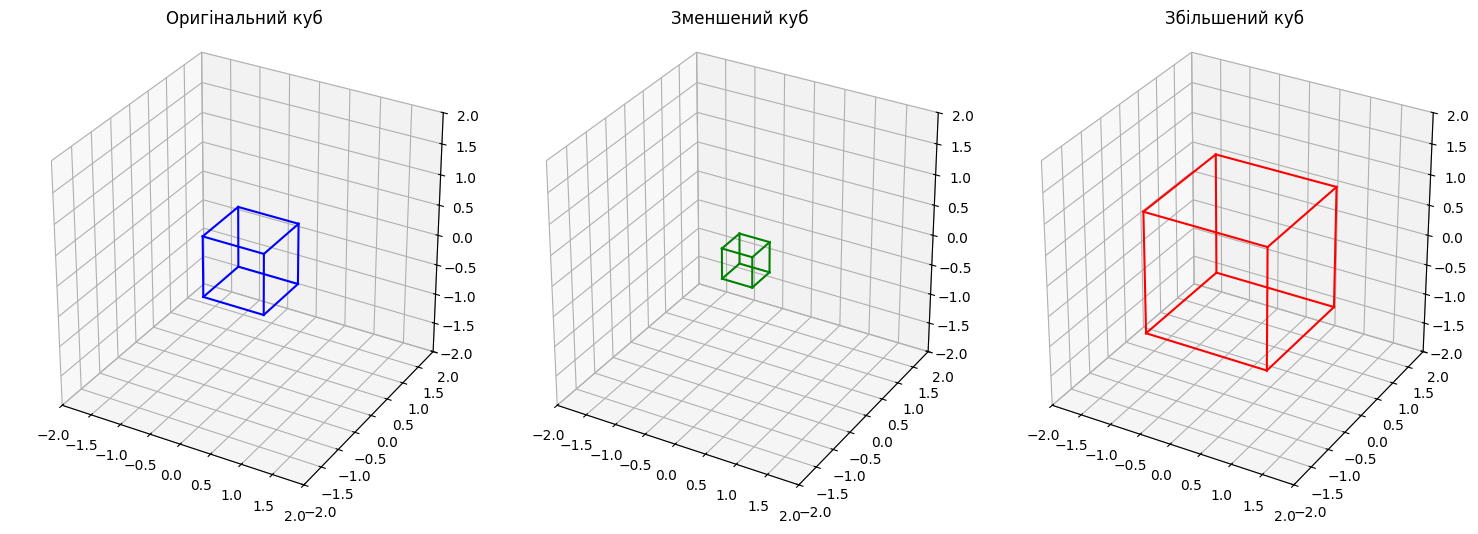

In [18]:
cube_vertices = np.array([
    [-0.5, -0.5, -0.5],
    [-0.5, -0.5,  0.5],
    [-0.5,  0.5, -0.5],
    [-0.5,  0.5,  0.5],
    [ 0.5, -0.5, -0.5],
    [ 0.5, -0.5,  0.5],
    [ 0.5,  0.5, -0.5],
    [ 0.5,  0.5,  0.5]
])

scale_down = 0.5
scale_up = 2.0

scaling_matrix_down = np.array([
    [scale_down, 0, 0],
    [0, scale_down, 0],
    [0, 0, scale_down]
])

scaling_matrix_up = np.array([
    [scale_up, 0, 0],
    [0, scale_up, 0],
    [0, 0, scale_up]
])

scaled_down_vertices = cube_vertices @ scaling_matrix_down.T
scaled_up_vertices = cube_vertices @ scaling_matrix_up.T

edges = [
    (0,1), (0,2), (0,4),
    (1,3), (1,5),
    (2,3), (2,6),
    (3,7),
    (4,5), (4,6),
    (5,7),
    (6,7)
]

fig = plt.figure(figsize=(15, 5))

def draw_cube(ax, vertices, color, title):
    for edge in edges:
        ax.plot(
            [vertices[edge[0]][0], vertices[edge[1]][0]],
            [vertices[edge[0]][1], vertices[edge[1]][1]],
            [vertices[edge[0]][2], vertices[edge[1]][2]],
            color
        )
    ax.set_title(title)
    ax.set_box_aspect([1,1,1])
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    ax.set_zlim([-2, 2])


ax1 = fig.add_subplot(131, projection='3d')
draw_cube(ax1, cube_vertices, 'b', "Оригінальний куб")

ax2 = fig.add_subplot(132, projection='3d')
draw_cube(ax2, scaled_down_vertices, 'g', "Зменшений куб")

ax3 = fig.add_subplot(133, projection='3d')
draw_cube(ax3, scaled_up_vertices, 'r', "Збільшений куб")

plt.tight_layout()
plt.show()


3. Отриманий результат з попереднього пункту симетрично відобрази
відносно початку координат, відносно однієї з координатних площин у
тривимірній декартовій системі координат (простір).

4. Задай пряму як у прикладі 1 даної лабораторної роботи. Здійсни поворот куба відносно прямої на деякий кут φ. Вкажи перетворення, які необхідні для одержання такого результату.

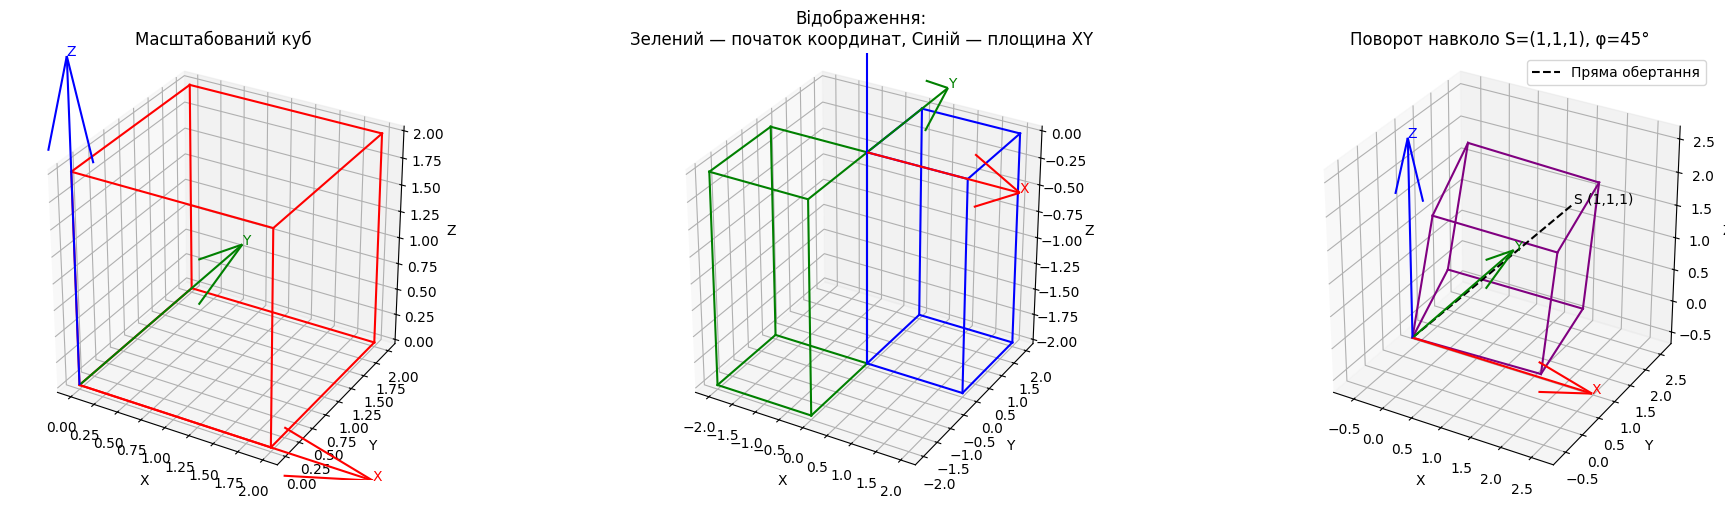

In [19]:
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
]

scale_matrix = np.array([
    [2, 0, 0],
    [0, 2, 0],
    [0, 0, 2]
])
scaled_vertices = vertices @ scale_matrix.T

reflection_origin = np.diag([-1, -1, -1]) 
reflection_xy = np.diag([1, 1, -1]) 
reflected_origin = scaled_vertices @ reflection_origin.T
reflected_xy = scaled_vertices @ reflection_xy.T

def rodrigues_rotation_matrix(axis, theta):
    axis = axis / np.linalg.norm(axis)
    x, y, z = axis
    c = np.cos(theta)
    s = np.sin(theta)
    C = 1 - c
    return np.array([
        [c + x*x*C, x*y*C - z*s, x*z*C + y*s],
        [y*x*C + z*s, c + y*y*C, y*z*C - x*s],
        [z*x*C - y*s, z*y*C + x*s, c + z*z*C]
    ])

M = np.array([0, 0, 0])
S = np.array([1, 1, 1])
phi = np.pi / 4 
R = rodrigues_rotation_matrix(S, phi)

translated = scaled_vertices - M
rotated = translated @ R.T + M

def draw_axes(ax, length=3):
    ax.quiver(0, 0, 0, length, 0, 0, color='r')
    ax.text(length, 0, 0, 'X', color='r')
    ax.quiver(0, 0, 0, 0, length, 0, color='g')
    ax.text(0, length, 0, 'Y', color='g')
    ax.quiver(0, 0, 0, 0, 0, length, color='b')
    ax.text(0, 0, length, 'Z', color='b')

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(131, projection='3d')
for edge in edges:
    ax1.plot(
        [scaled_vertices[edge[0]][0], scaled_vertices[edge[1]][0]],
        [scaled_vertices[edge[0]][1], scaled_vertices[edge[1]][1]],
        [scaled_vertices[edge[0]][2], scaled_vertices[edge[1]][2]],
        'r'
    )
draw_axes(ax1)
ax1.set_title("Масштабований куб")
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("Z")
ax1.set_box_aspect([1,1,1])

ax2 = fig.add_subplot(132, projection='3d')
for edge in edges:
    ax2.plot(
        [reflected_origin[edge[0]][0], reflected_origin[edge[1]][0]],
        [reflected_origin[edge[0]][1], reflected_origin[edge[1]][1]],
        [reflected_origin[edge[0]][2], reflected_origin[edge[1]][2]],
        'g'
    )
    ax2.plot(
        [reflected_xy[edge[0]][0], reflected_xy[edge[1]][0]],
        [reflected_xy[edge[0]][1], reflected_xy[edge[1]][1]],
        [reflected_xy[edge[0]][2], reflected_xy[edge[1]][2]],
        'b'
    )
draw_axes(ax2)
ax2.set_title("Відображення:\nЗелений — початок координат, Синій — площина XY")
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_zlabel("Z")
ax2.set_box_aspect([1,1,1])

ax3 = fig.add_subplot(133, projection='3d')
for edge in edges:
    ax3.plot(
        [rotated[edge[0]][0], rotated[edge[1]][0]],
        [rotated[edge[0]][1], rotated[edge[1]][1]],
        [rotated[edge[0]][2], rotated[edge[1]][2]],
        'purple'
    )

line_dir = S / np.linalg.norm(S) * 3
ax3.plot([0, line_dir[0]], [0, line_dir[1]], [0, line_dir[2]], 'k--', label="Пряма обертання")
ax3.text(line_dir[0], line_dir[1], line_dir[2], 'S (1,1,1)', color='black')

draw_axes(ax3)
ax3.set_title("Поворот навколо S=(1,1,1), φ=45°")
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.set_box_aspect([1,1,1])
ax3.legend()

plt.tight_layout()
plt.show()


шото не то

5. Задай площину, здійснити симетрію куба відносно площини.

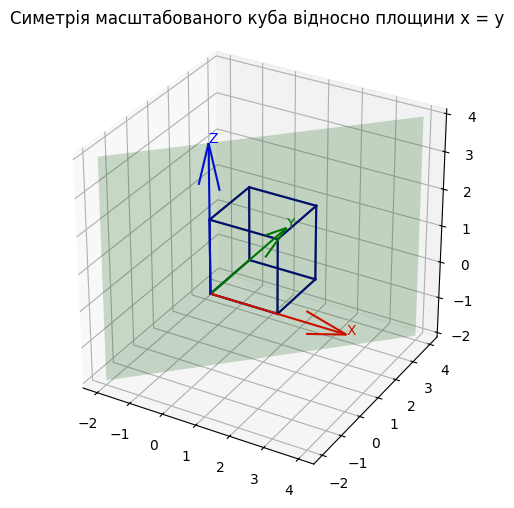

In [20]:
P0 = np.array([0, 0, 0]) 
n = np.array([1, -1, 0]) 

def reflect_point_plane(v, P0, n):
    n_norm_sq = np.dot(n, n)
    return v - 2 * np.dot(v - P0, n) / n_norm_sq * n

reflected_plane = np.array([reflect_point_plane(v, P0, n) for v in scaled_vertices])

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    ax.plot(
        [scaled_vertices[edge[0]][0], scaled_vertices[edge[1]][0]],
        [scaled_vertices[edge[0]][1], scaled_vertices[edge[1]][1]],
        [scaled_vertices[edge[0]][2], scaled_vertices[edge[1]][2]],
        'gray'
    )

for edge in edges:
    ax.plot(
        [reflected_plane[edge[0]][0], reflected_plane[edge[1]][0]],
        [reflected_plane[edge[0]][1], reflected_plane[edge[1]][1]],
        [reflected_plane[edge[0]][2], reflected_plane[edge[1]][2]],
        'darkblue'
    )

plane_range = np.linspace(-2, 4, 10)
xx, zz = np.meshgrid(plane_range, plane_range)
yy = xx  

ax.plot_surface(xx, yy, zz, alpha=0.2, color='green', label='Площина')

def draw_axes(ax, length=4):
    ax.quiver(0, 0, 0, length, 0, 0, color='r')
    ax.text(length, 0, 0, 'X', color='r')
    ax.quiver(0, 0, 0, 0, length, 0, color='g')
    ax.text(0, length, 0, 'Y', color='g')
    ax.quiver(0, 0, 0, 0, 0, length, color='b')
    ax.text(0, 0, length, 'Z', color='b')

draw_axes(ax)

ax.set_title("Симетрія масштабованого куба відносно площини x = y")
ax.set_box_aspect([1,1,1])
plt.tight_layout()
plt.show()


6,7.
Запропонувати інший набір перетворень для отримання результатів, які наведені у прикладі 2 даної
лабораторної роботи. Тобто здійснити інші перетворення за загальним
підходом (симетрія, поворот, перенесення), показати їх математично.

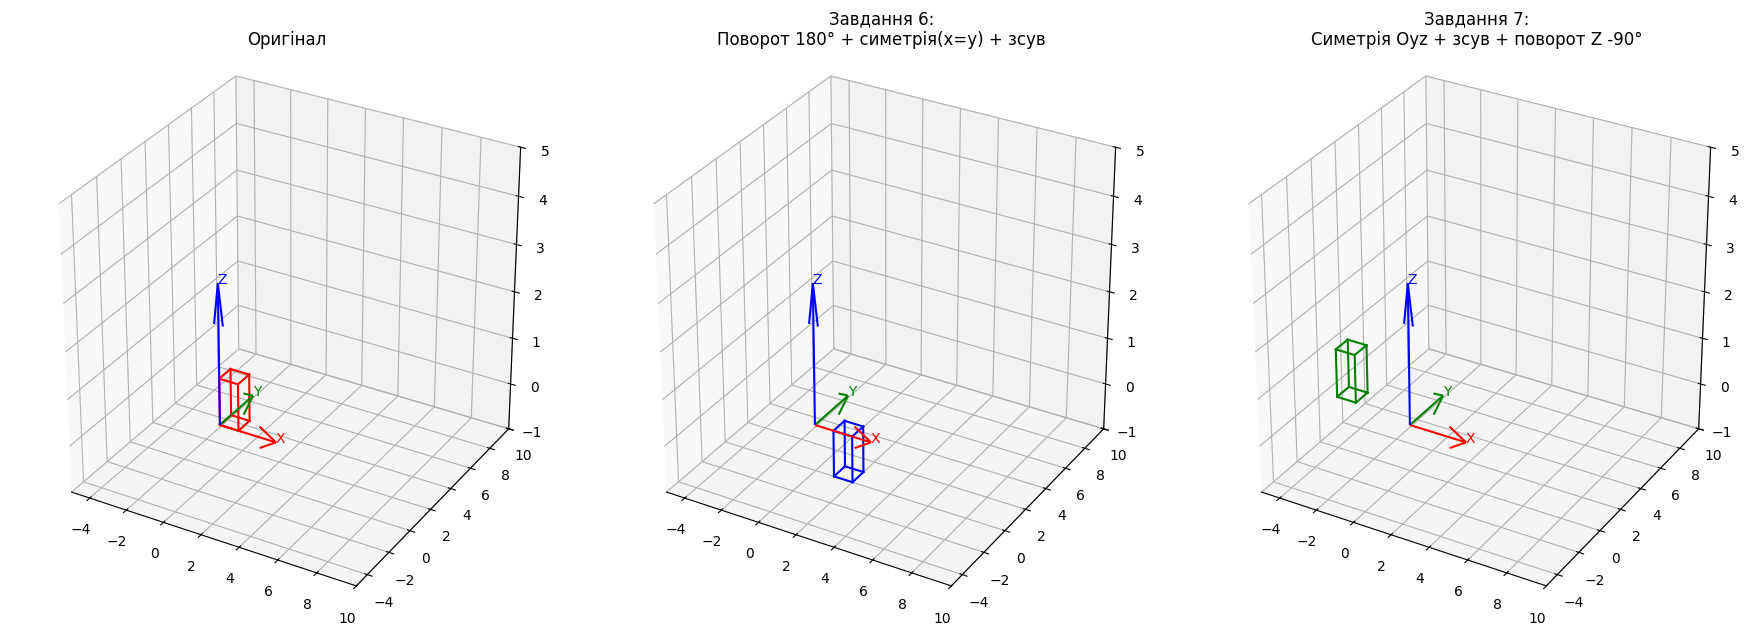

In [22]:
# 6
R_180 = np.diag([-1, -1, -1])
v6_step1 = vertices @ R_180.T

S_xy = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])
v6_step2 = v6_step1 @ S_xy.T

v6_final = v6_step2 + np.array([2, 1, 0])

# 7
S_oyz = np.diag([-1, 1, 1])
v7_step1 = vertices @ S_oyz.T

v7_step2 = v7_step1 + np.array([3, -2, 1])

theta = -np.pi / 2
Rz = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta),  np.cos(theta), 0],
    [0, 0, 1]
])
v7_final = v7_step2 @ Rz.T


fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(131, projection='3d')
draw_cube(ax1, vertices, 'red', "Оригінал")

ax2 = fig.add_subplot(132, projection='3d')
draw_cube(ax2, v6_final, 'blue', "Завдання 6:\nПоворот 180° + симетрія(х=у) + зсув")

ax3 = fig.add_subplot(133, projection='3d')
draw_cube(ax3, v7_final, 'green', "Завдання 7:\nСиметрія Oyz + зсув + поворот Z -90°")

plt.tight_layout()
plt.show()


8.Навести алгоритм з математичними перетвореннями для побудови симетрії відносно площини на основі знань з аналітичної геометрії. Порівняти результати 

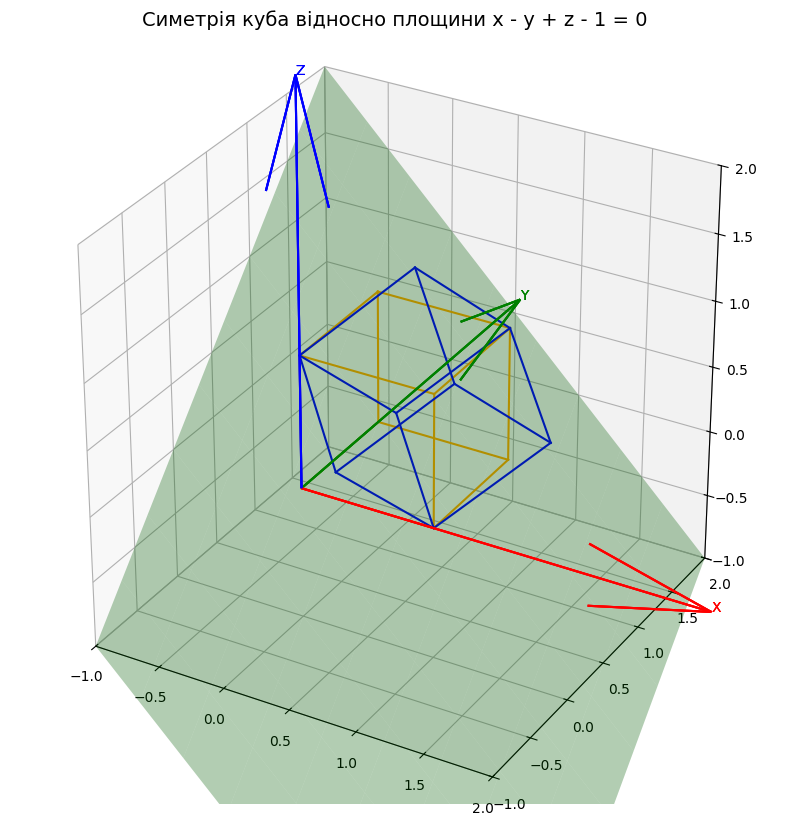

In [23]:
vertices = np.array([
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
])

edges = [
    [0, 1], [1, 2], [2, 3], [3, 0],
    [4, 5], [5, 6], [6, 7], [7, 4],
    [0, 4], [1, 5], [2, 6], [3, 7]
]

A, B, C, D = 1, -1, 1, -1  

n = np.array([A, B, C])
n_norm_sq = np.dot(n, n)

point_on_plane = np.array([1, 1, 1]) 

reflected_vertices = []
for v in vertices:
    diff = v - point_on_plane
    projection_len = 2 * np.dot(diff, n) / n_norm_sq
    reflection = v - projection_len * n
    reflected_vertices.append(reflection)
reflected_vertices = np.array(reflected_vertices)

fig = plt.figure(figsize=(16, 10))  
ax = fig.add_subplot(111, projection='3d')


draw_axes(ax)
draw_cube(ax, vertices, 'orange', 'О')
draw_cube(ax, reflected_vertices, 'blue', 'В')

xx, yy = np.meshgrid(np.linspace(-1, 2, 10), np.linspace(-1, 2, 10))
zz = (D - A * xx - B * yy) / C
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

ax.set_xlim(-1, 2)
ax.set_ylim(-1, 2)
ax.set_zlim(-1, 2)

ax.set_box_aspect([1, 1, 1])
ax.set_title("Симетрія куба відносно площини x - y + z - 1 = 0", fontsize=14)

plt.show()


10.Взяти той самий куб, який був поданий у попередніх
пунктах. Здійснити ортогональне проектування даного кубу на площину
загального виду, яка не паралельна жодній з координатних площин. Вказати
відповідні математичні перетворення, розробити відповідне програмне
забезпечення.

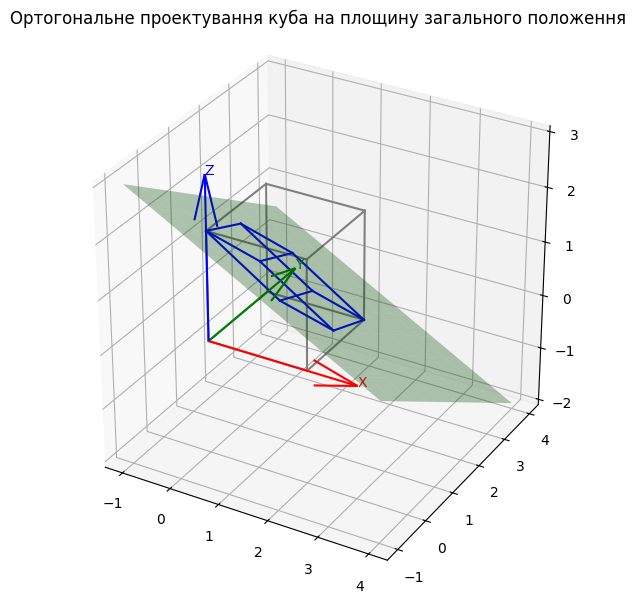

In [24]:
scale_matrix = np.diag([2, 2, 2])
scaled_vertices = vertices @ scale_matrix.T

P0 = np.array([1, 1, 1])   
n = np.array([1, 1, 2])         

def project_point_to_plane(v, P0, n):
    return v - np.dot(v - P0, n) / np.dot(n, n) * n

projected_vertices = np.array([project_point_to_plane(v, P0, n) for v in scaled_vertices])

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

for edge in edges:
    ax.plot(
        [scaled_vertices[edge[0]][0], scaled_vertices[edge[1]][0]],
        [scaled_vertices[edge[0]][1], scaled_vertices[edge[1]][1]],
        [scaled_vertices[edge[0]][2], scaled_vertices[edge[1]][2]],
        'gray'
    )

for edge in edges:
    ax.plot(
        [projected_vertices[edge[0]][0], projected_vertices[edge[1]][0]],
        [projected_vertices[edge[0]][1], projected_vertices[edge[1]][1]],
        [projected_vertices[edge[0]][2], projected_vertices[edge[1]][2]],
        'blue'
    )

plane_range = np.linspace(-1, 4, 10)
xx, yy = np.meshgrid(plane_range, plane_range)

a, b, c = n
d = -np.dot(n, P0)
zz = (-a * xx - b * yy - d) / c

ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

draw_axes(ax)

ax.set_title("Ортогональне проектування куба на площину загального положення")
ax.set_box_aspect([1, 1, 1])
plt.tight_layout()
plt.show()
